# Spoken translation
- sigth interpretation


In [64]:
import os
import sys
import os.path
import glob
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

import scipy
from scipy import stats

sys.path.append('/data/critt/tprdb/bin/')
import TPRDB
import importlib
importlib.reload(TPRDB)

<module 'TPRDB' from '/data/critt/tprdb/bin/TPRDB.py'>

In [66]:
# Read ST tables
EarST = TPRDB.readTPRDBtables(["IMBi18/Tables/"], "*st", path="/data/critt/tprdb/TPRDB/", verbose = 1)
EyeST = TPRDB.readTPRDBtables(["IMBst18/Tables/"], "*st", path="/data/critt/tprdb/TPRDB/", verbose = 1)

IMBi18/Tables/	#sessions:54	*st:8514
IMBst18/Tables/	#sessions:54	*st:8514


In [5]:
print("rows, columns:", EarST.shape)
print("rows, columns:", EyeST.shape)

rows, columns: (8514, 93)
rows, columns: (8514, 93)


## Features:

Time when a word was spoken/fixated:

- Stime: time when the ST word was spolen 
- FFtime: time when the ST word was first fixated
- Time1: time when the TT word was spoken

Duration of a word was spoken/fixated:
- Sdur: Duration of the ST word production
- FFdur: Duration of the first fixation 
- Dur1: Duration of the TT word production

EarST: Voice of ST speech
- Stime: time when the ST word was spolen 
- Sdur: Duration of the ST word production

EyeST: Gaze ST text:
- FFtime: time when the ST word was first fixated
- Time1: time when the TT word was spoken

- FFdur: Duration of the first fixation 
- Dur1: Duration of the TT word production


In [7]:
pd.set_option('display.max_columns', 500)
EarST.head(5)

,Id,Study,Session,SL,TL,Task,Text,Part,STseg,SToken,Lemma,SGid,SGroup,SGx,SGnbr,STime,Cur,Ins,Del,Pause,Dur,Sdur,Prob1,Prob2,PoS,UPoS,TGroup,TGid,TGnbr,Munit,Cross,Edit1,Time1,Dur1,Pause1,Pause1TrtS,Pause1TrtT,ParFixS1,ParTrtS1,ParFixT1,ParTrtT1,Edit2,Time2,Dur2,Pause2,Pause2TrtS,Pause2TrtT,ParFixS2,ParTrtS2,ParFixT2,ParTrtT2,TimeR,DurR,EditR,Runit,FFTime,FFDTime,FFDur,RPDur,Regr,FixS,FPDurS,TrtS,FixT,FPDurT,TrtT,ParFixS,ParTrtS,ParFixT,ParTrtT,InEff,Yawat,PUnbr,PUdur,PUpause,PUsid,PUtid,PUslen,PUtlen,Edit,AltT,CountT,ProbT,HTra,AltS,ProbS,HSgrp,AltC,ProbC,HCross,AltSTC,ProbSTC,HSTC
0,1,IMBi18,P01_I1,en,zh,I,1,P01,1,This,---,1+2,This_is,1,2,3323,0,2,0,5343,300,210,0,0,---,---,这是,1,1,1,1,这是,5343,300,5343,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,---,1,2020,5343,1+2+3,1+2+3+4+5,3,5,这是,4,6,0.6667,1.4466,2,0.8889,0.5033,3,0.7778,0.9864,4,0.6667,1.4466
1,2,IMBi18,P01_I1,en,zh,I,1,P01,1,is,---,1+2,This_is,2,2,3533,5,2,0,5343,300,180,0,0,---,---,这是,1,1,1,0,这是,5343,300,5343,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,---,1,2020,5343,1+2+3,1+2+3+4+5,3,5,这是,4,6,0.6667,1.4466,2,0.8889,0.5033,3,0.7778,0.9864,4,0.6667,1.4466
2,3,IMBi18,P01_I1,en,zh,I,1,P01,1,my,---,3,my,1,1,3713,8,1,0,0,430,340,0,0,---,---,我,2,1,1,1,我,5643,430,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.50,---,1,2020,5343,1+2+3,1+2+3+4+5,3,5,我,3,7,0.7778,0.9864,2,0.8889,0.5033,4,0.6667,1.4466,4,0.6667,1.4466
3,4,IMBi18,P01_I1,en,zh,I,1,P01,1,third,---,4,third,1,1,4083,11,3,0,160,340,280,0,0,---,---,第三次,9,1,1,7,第三次,11643,340,160,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25,---,1,3100,3120,4+5+6+7+8+14+15+16,6+7+8+9+10+11+12,8,7,第三次,5,1,0.1111,1.8800,2,0.8889,0.5033,7,0.1111,2.7255,7,0.1111,2.7255
4,5,IMBi18,P01_I1,en,zh,I,1,P01,1,visit,---,5+6,visit_to,1,2,4363,17,2,0,180,200,480,0,0,---,---,来到,10,1,1,1,来到,12163,200,180,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.33,---,1,3100,3120,4+5+6+7+8+14+15+16,6+7+8+9+10+11+12,8,7,来到,5,2,0.2222,2.0588,3,0.7778,0.9864,4,0.2222,1.6577,6,0.1111,2.2810


In [9]:
EyeST.head(5)

,Id,Study,Session,SL,TL,Task,Text,Part,STseg,SToken,Lemma,SGid,SGroup,SGx,SGnbr,STime,Cur,Ins,Del,Pause,Dur,Sdur,Prob1,Prob2,PoS,UPoS,TGroup,TGid,TGnbr,Munit,Cross,Edit1,Time1,Dur1,Pause1,Pause1TrtS,Pause1TrtT,ParFixS1,ParTrtS1,ParFixT1,ParTrtT1,Edit2,Time2,Dur2,Pause2,Pause2TrtS,Pause2TrtT,ParFixS2,ParTrtS2,ParFixT2,ParTrtT2,TimeR,DurR,EditR,Runit,FFTime,FFDTime,FFDur,RPDur,Regr,FixS,FPDurS,TrtS,FixT,FPDurT,TrtT,ParFixS,ParTrtS,ParFixT,ParTrtT,InEff,Yawat,PUnbr,PUdur,PUpause,PUsid,PUtid,PUslen,PUtlen,Edit,AltT,CountT,ProbT,HTra,AltS,ProbS,HSgrp,AltC,ProbC,HCross,AltSTC,ProbSTC,HSTC
0,1,IMBst18,P01_Ist1,en,zh,Ist,1,P01,1,This,---,1+2,This_is,1,2,0,0,2,0,5343,300,0,0,0,---,---,这是,1,1,1,1,这是,5343,300,5343,0,0,0,0,0,0,---,0,0,0,5173,0,0,0,0,0,0,0,---,0,873,6551,243,243,0,5,243,1984,4,1299,1299,0,0,0,0,0.33,---,1,2020,5343,1+2+3,1+2+3+4+5,3,5,这是,4,6,0.6667,1.4466,2,0.8889,0.5033,3,0.7778,0.9864,4,0.6667,1.4466
1,2,IMBst18,P01_Ist1,en,zh,Ist,1,P01,1,is,---,1+2,This_is,2,2,0,5,2,0,5343,300,0,0,0,---,---,这是,1,1,1,0,这是,5343,300,5343,5173,0,2,296,0,0,---,0,0,0,5173,0,0,0,0,0,0,0,---,0,1107,0,223,223,0,1,223,223,4,1299,1299,2,296,0,0,0.33,---,1,2020,5343,1+2+3,1+2+3+4+5,3,5,这是,4,6,0.6667,1.4466,2,0.8889,0.5033,3,0.7778,0.9864,4,0.6667,1.4466
2,3,IMBst18,P01_Ist1,en,zh,Ist,1,P01,1,my,---,3,my,1,1,0,8,1,0,0,430,0,0,0,---,---,我,2,1,1,1,我,5643,430,0,0,0,2,424,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,2,424,0,0,0.50,---,1,2020,5343,1+2+3,1+2+3+4+5,3,5,我,3,7,0.7778,0.9864,2,0.8889,0.5033,4,0.6667,1.4466,4,0.6667,1.4466
3,4,IMBst18,P01_Ist1,en,zh,Ist,1,P01,1,third,---,4,third,1,1,0,11,3,0,160,340,0,0,0,---,---,第三次,9,1,1,7,第三次,11643,340,160,160,0,2,324,0,0,---,0,0,0,160,0,0,0,0,0,0,0,---,0,1325,0,283,283,0,2,283,673,0,0,0,2,324,0,0,0.25,---,1,3100,3120,4+5+6+7+8+14+15+16,6+7+8+9+10+11+12,8,7,第三次,5,1,0.1111,1.8800,2,0.8889,0.5033,7,0.1111,2.7255,7,0.1111,2.7255
4,5,IMBst18,P01_Ist1,en,zh,Ist,1,P01,1,visit,---,5+6,visit_to,1,2,0,17,2,0,180,200,0,0,0,---,---,来到,10,1,1,1,来到,12163,200,180,0,0,0,0,0,0,---,0,0,0,168,0,0,0,0,0,0,0,---,0,1622,0,164,164,0,1,164,164,0,0,0,0,0,0,0,0.33,---,1,3100,3120,4+5+6+7+8+14+15+16,6+7+8+9+10+11+12,8,7,来到,5,2,0.2222,2.0588,3,0.7778,0.9864,4,0.2222,1.6577,6,0.1111,2.2810


In [67]:
# Copy STime and Sdur to EyeST

EyeST['STime'] = EarST['STime']
EyeST['Sdur'] = EarST['Sdur']
EyeST.head(5)

,Id,Study,Session,SL,TL,Task,Text,Part,STseg,SToken,Lemma,SGid,SGroup,SGx,SGnbr,STime,Cur,Ins,Del,Pause,Dur,Sdur,Prob1,Prob2,PoS,UPoS,TGroup,TGid,TGnbr,Munit,Cross,Edit1,Time1,Dur1,Pause1,Pause1TrtS,Pause1TrtT,ParFixS1,ParTrtS1,ParFixT1,ParTrtT1,Edit2,Time2,Dur2,Pause2,Pause2TrtS,Pause2TrtT,ParFixS2,ParTrtS2,ParFixT2,ParTrtT2,TimeR,DurR,EditR,Runit,FFTime,FFDTime,FFDur,RPDur,Regr,FixS,FPDurS,TrtS,FixT,FPDurT,TrtT,ParFixS,ParTrtS,ParFixT,ParTrtT,InEff,Yawat,PUnbr,PUdur,PUpause,PUsid,PUtid,PUslen,PUtlen,Edit,AltT,CountT,ProbT,HTra,AltS,ProbS,HSgrp,AltC,ProbC,HCross,AltSTC,ProbSTC,HSTC
0,1,IMBst18,P01_Ist1,en,zh,Ist,1,P01,1,This,---,1+2,This_is,1,2,3323,0,2,0,5343,300,210,0,0,---,---,这是,1,1,1,1,这是,5343,300,5343,0,0,0,0,0,0,---,0,0,0,5173,0,0,0,0,0,0,0,---,0,873,6551,243,243,0,5,243,1984,4,1299,1299,0,0,0,0,0.33,---,1,2020,5343,1+2+3,1+2+3+4+5,3,5,这是,4,6,0.6667,1.4466,2,0.8889,0.5033,3,0.7778,0.9864,4,0.6667,1.4466
1,2,IMBst18,P01_Ist1,en,zh,Ist,1,P01,1,is,---,1+2,This_is,2,2,3533,5,2,0,5343,300,180,0,0,---,---,这是,1,1,1,0,这是,5343,300,5343,5173,0,2,296,0,0,---,0,0,0,5173,0,0,0,0,0,0,0,---,0,1107,0,223,223,0,1,223,223,4,1299,1299,2,296,0,0,0.33,---,1,2020,5343,1+2+3,1+2+3+4+5,3,5,这是,4,6,0.6667,1.4466,2,0.8889,0.5033,3,0.7778,0.9864,4,0.6667,1.4466
2,3,IMBst18,P01_Ist1,en,zh,Ist,1,P01,1,my,---,3,my,1,1,3713,8,1,0,0,430,340,0,0,---,---,我,2,1,1,1,我,5643,430,0,0,0,2,424,0,0,---,0,0,0,0,0,0,0,0,0,0,0,---,0,0,0,0,0,0,0,0,0,0,0,0,2,424,0,0,0.50,---,1,2020,5343,1+2+3,1+2+3+4+5,3,5,我,3,7,0.7778,0.9864,2,0.8889,0.5033,4,0.6667,1.4466,4,0.6667,1.4466
3,4,IMBst18,P01_Ist1,en,zh,Ist,1,P01,1,third,---,4,third,1,1,4083,11,3,0,160,340,280,0,0,---,---,第三次,9,1,1,7,第三次,11643,340,160,160,0,2,324,0,0,---,0,0,0,160,0,0,0,0,0,0,0,---,0,1325,0,283,283,0,2,283,673,0,0,0,2,324,0,0,0.25,---,1,3100,3120,4+5+6+7+8+14+15+16,6+7+8+9+10+11+12,8,7,第三次,5,1,0.1111,1.8800,2,0.8889,0.5033,7,0.1111,2.7255,7,0.1111,2.7255
4,5,IMBst18,P01_Ist1,en,zh,Ist,1,P01,1,visit,---,5+6,visit_to,1,2,4363,17,2,0,180,200,480,0,0,---,---,来到,10,1,1,1,来到,12163,200,180,0,0,0,0,0,0,---,0,0,0,168,0,0,0,0,0,0,0,---,0,1622,0,164,164,0,1,164,164,0,0,0,0,0,0,0,0.33,---,1,3100,3120,4+5+6+7+8+14+15+16,6+7+8+9+10+11+12,8,7,来到,5,2,0.2222,2.0588,3,0.7778,0.9864,4,0.2222,1.6577,6,0.1111,2.2810


# Take out zero rows 
- no translation
- no production duration
- no fixation duration

In [69]:
# take out words with no translation (TGroup empty)
shape = EyeST.shape
EyeST1 = EyeST[EyeST['TGroup'] != '---']

print(f"rows before:{shape[0]} after:{EyeST1.shape[0]} deleted:{shape[0] - EyeST1.shape[0]}") 

rows before:8514 after:7470 deleted:1044


In [70]:
# take out words with no production time 
shape = EyeST1.shape
EyeST1 = EyeST1[EyeST1['Dur1'] > 0]

print(f"rows before:{shape[0]} after:{EyeST1.shape[0]} deleted:{shape[0] - EyeST1.shape[0]}") 

rows before:7470 after:7410 deleted:60


In [71]:
# take out words with no fixation (FFTime == 0)
shape = EyeST1.shape
EyeST1 = EyeST1[(EyeST1['FFTime'] > 0)]

print(f"rows before:{shape[0]} after:{EyeST1.shape[0]} deleted:{shape[0] - EyeST1.shape[0]}") 

rows before:7410 after:4396 deleted:3014


## Compute span
- Eye-Voice span: Time1 - FFTime 
- Ear-Voice span: Time1 - Stime 
- Ear-Eye span: Stime - FFTime


In [76]:
# Ear-Eye span: earTime - eyeTime
EyeST1['EIS'] = EyeST1['STime'] - EyeST1['FFTime'] 
EyeST1['IVS'] = EyeST1['Time1'] - EyeST1['FFTime']
EyeST1['EVS'] = EyeST1['Time1'] - EyeST1['STime']

EyeST1.head(5)
EyeST1[['EIS','IVS', 'EVS']].describe()

,EIS,IVS,EVS
count,4396.000000,4396.000000,4396.000000
mean,-4504.361692,1880.659918,6385.021611
std,15249.442598,13527.672952,6781.139945
min,-109765.000000,-110287.000000,-4807.000000
25%,-9797.000000,-536.500000,2447.500000
50%,-2692.000000,1588.500000,4250.000000
75%,1269.000000,5128.000000,7500.000000
max,73590.000000,76030.000000,46660.000000


Text(25000, 500, '$\\mu$=1880.66')

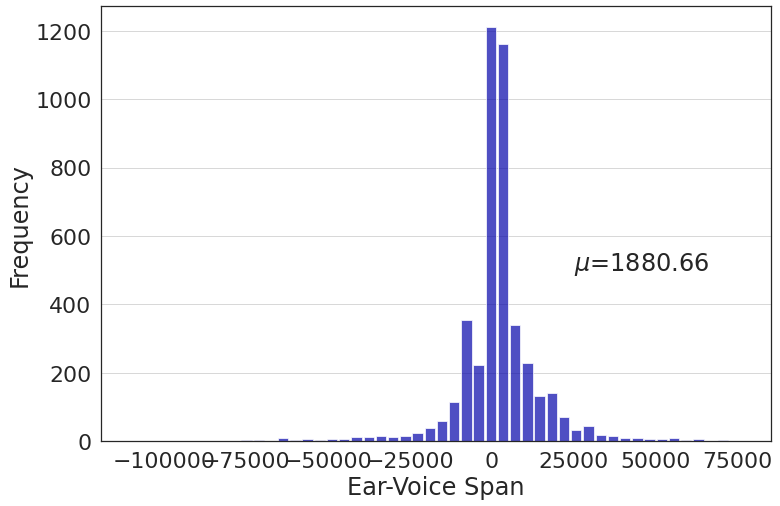

In [77]:

sns.set(font_scale = 2)
sns.set_style("white")
rcParams['figure.figsize'] = 12,8
data = EyeST1['IVS']
mean = np.mean(EyeST1['IVS'])
# An "interface" to matplotlib.axes.Axes.hist() method
plt.hist(data, bins=50, color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Ear-Voice Span')
plt.ylabel('Frequency')
plt.text(25000, 500, f'$\mu$={mean:.2f}')


Text(25000, 500, '$\\mu$=-4504.36')

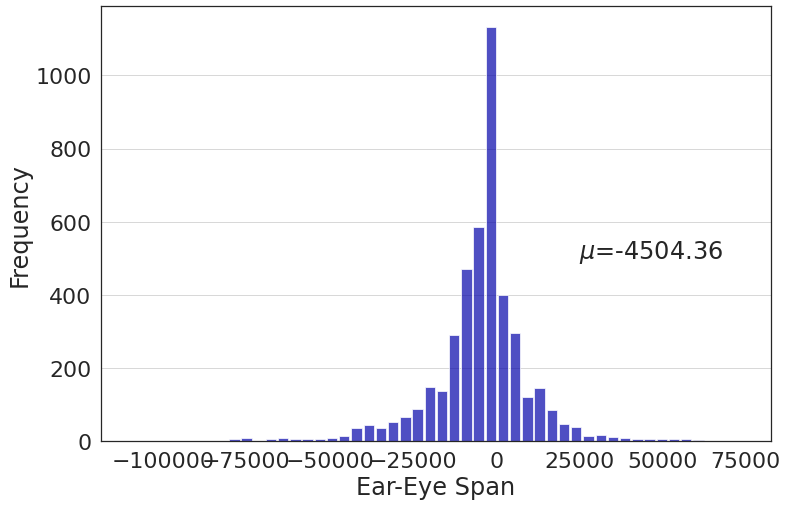

In [62]:
#rcParams['figure.figsize'] = 12,8

data = EyeST1['EIS']

# An "interface" to matplotlib.axes.Axes.hist() method
plt.hist(data, bins=50, color='#0504aa', alpha=0.7, rwidth=0.85)
mean = np.mean(EyeST1['EIS'])

#font={'size': 30}
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Ear-Eye Span')
plt.ylabel('Frequency')
plt.text(25000, 500, f'$\mu$={mean:.2f}')



Text(25000, 60000, '\nr=-0.0194\np=0.1979')

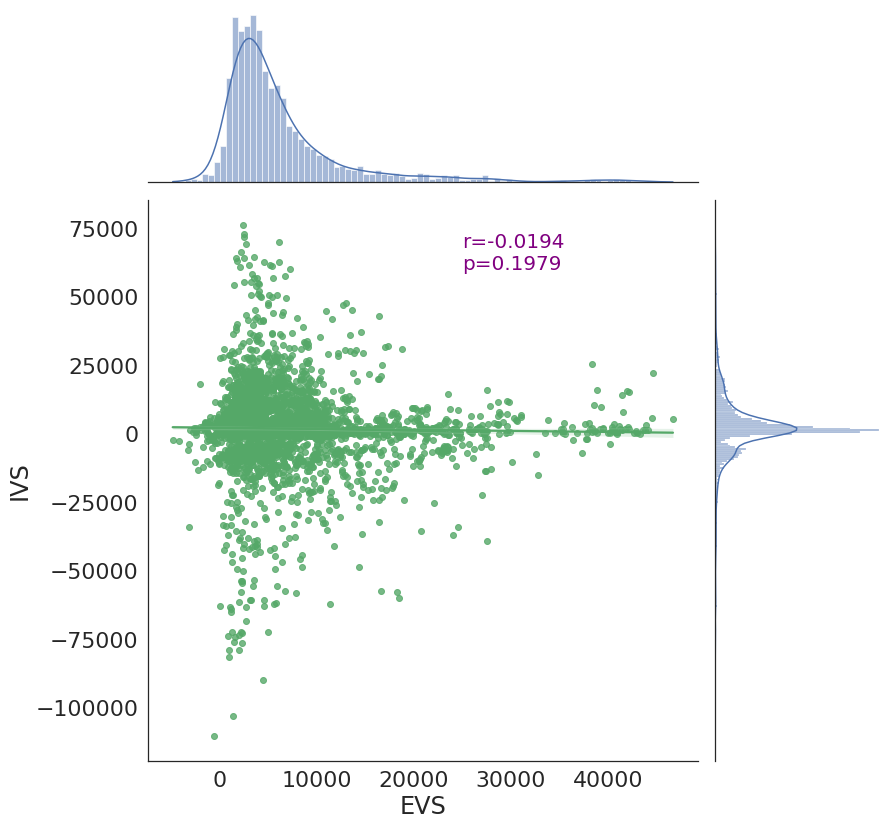

In [63]:
sns.set(font_scale = 2)
sns.set_style("white")

res = stats.pearsonr(x=EyeST1['EVS'], y=EyeST1['IVS'])

g = sns.JointGrid(data=EyeST1, x='EVS', y='IVS', height=12, ratio=3, space=0.1)
g.plot_joint(sns.regplot, color="g")
g.plot_marginals(sns.histplot, kde=True)
g.ax_joint.text(25000, 60000, f'\nr={res[0]:4.4f}\np={res[1]:4.4f}', size=20, color='purple')
#-4400